In [1]:
# using Lasso to train the model

In [2]:
# to change the data into the right format
def transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    #print(len(series))
    for i in range(len(series)-window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    # reshape each 
    
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    return X,y

In [3]:
# normalise the data that will be used to train the model
from pandas import Series
import numpy as np
import pandas as pd
series = Series.from_csv('N_cur_2017_01_05.csv', header=0)
series = pd.to_numeric(series,errors='coerce')
series = series.dropna(axis=0)
window_size = 7
series = series.tolist()
#print (len(series))
# series = series[0:500]
mean_series = np.mean(series)
series = (series-mean_series)/mean_series

X,y = transform_series(series = series,window_size = window_size)

In [4]:
# to divide the dataset into training set and test set
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point, np.ceil: Return the ceiling of the input, element-wise.

# 2/3 of the whole dataset is training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# 1/3 of the whole dataset is test set
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model

from sklearn.linear_model import BayesianRidge, LinearRegression
X = X_train
y = y_train
#clf = BayesianRidge(compute_score=True)
#clf.fit(X, y)
reg = linear_model.Lasso(alpha = 0.001)
reg.fit(X, y)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

The score of the mean-absolute-error
0.12410867102


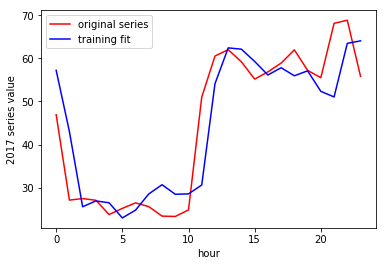

In [14]:
# 图像展示预测结果
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
%matplotlib inline

# plot original series
plt.plot(series[-24:]*mean_series+mean_series,color = 'r', label='Original')
#test_predict = clf.predict(X_test)
test_predict = reg.predict(X_test)
print("The score of the mean-absolute-error")
print (mean_absolute_error(y_test, test_predict))
# print(len(test_predict))
# plot testing set prediction
plt.plot(np.arange(0,24,1),test_predict[-24:]*mean_series+mean_series,color = 'b', label='Predict')

# pretty up graph
plt.xlabel('hour')
plt.ylabel('2017 series value')
plt.legend(['original series','training fit','testing fit'],loc='best')
plt.show()